# Notes: [Type I and Type II neuron models](https://neuronaldynamics.epfl.ch/online/Ch4.S4.html)

neuron models fall in two classes: those with a ***continuous frequency-current curve*** are called **Type I** whereas those with a ***discontinuous frequency-current curve*** are called **Type II**.

The onset of repetitive firing under constant current injection is characterized by a minimal current $I_\theta$, also called the **rheobase current**.

<img src='figures/9-4.4.png'/>

# Codes: [Type I and type II neuron models](https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/neuron-type.html)

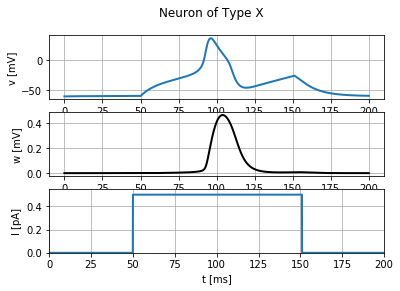

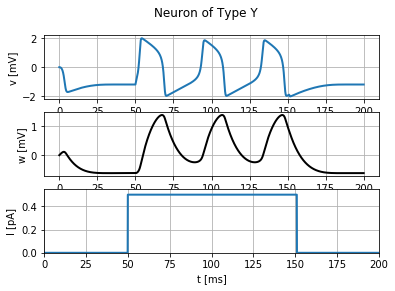

In [2]:
%matplotlib inline  
# needed in Notebooks, not in Python scripts
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.tools import input_factory, plot_tools, spike_tools
from neurodynex.neuron_type import neurons

# create an input current
input_current = input_factory.get_step_current(50, 150, 1.*b2.ms, 0.5*b2.pA)

# get one instance of class NeuronX and save that object in the variable 'a_neuron_of_type_X'
a_neuron_of_type_X = neurons.NeuronX()  # we do not know if it's type I or II
# simulate it and get the state variables
state_monitor = a_neuron_of_type_X.run(input_current, 200*b2.ms)
# plot state vs. time
neurons.plot_data(state_monitor, title="Neuron of Type X")

# get an instance of class NeuronY
a_neuron_of_type_Y = neurons.NeuronY()  # we do not know if it's type I or II
state_monitor = a_neuron_of_type_Y.run(input_current, 200*b2.ms)
neurons.plot_data(state_monitor, title="Neuron of Type Y")

## Exercise: Probing Type I and Type II neuron models

### Question: Estimating the threshold

#### x neuron

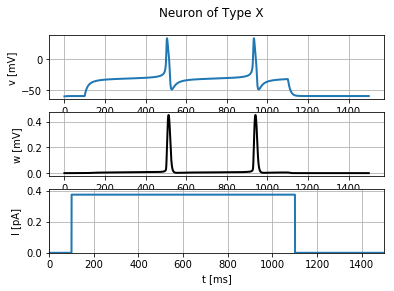

In [121]:
# create an input current
I_amp=0.375*b2.pA
input_current = input_factory.get_step_current(
    100, 1100, 1.*b2.ms, I_amp)

# get one instance of class NeuronX and save that object in the variable 'a_neuron_of_type_X'
a_neuron_of_type_X = neurons.NeuronX()  # we do not know if it's type I or II
# simulate it and get the state variables
state_monitor = a_neuron_of_type_X.run(
    input_current, 1500*b2.ms)
# plot state vs. time
neurons.plot_data(state_monitor, title="Neuron of Type X")

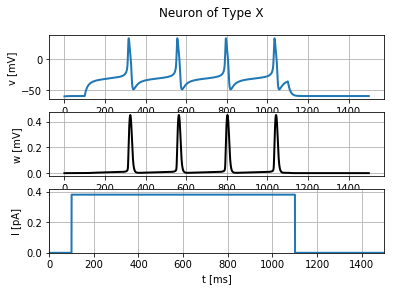

In [62]:
# create an input current
I_amp=0.38*b2.pA
input_current = input_factory.get_step_current(
    100, 1100, 1.*b2.ms, I_amp)

# get one instance of class NeuronX and save that object in the variable 'a_neuron_of_type_X'
a_neuron_of_type_X = neurons.NeuronX()  # we do not know if it's type I or II
# simulate it and get the state variables
state_monitor = a_neuron_of_type_X.run(
    input_current, 1500*b2.ms)
# plot state vs. time
neurons.plot_data(state_monitor, title="Neuron of Type X")

About $25 mV$. No jump there, Type I

#### y neuron

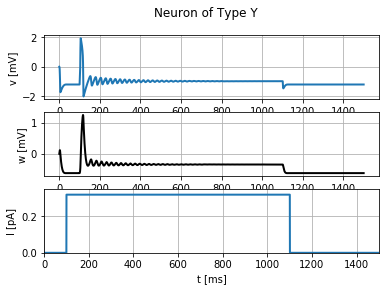

In [119]:
# create an input current
I_amp=0.32*b2.pA
input_current = input_factory.get_step_current(
    100, 1100, 1.*b2.ms, I_amp)
# get an instance of class NeuronY
a_neuron_of_type_Y = neurons.NeuronY()  # we do not know if it's type I or II
state_monitor = a_neuron_of_type_Y.run(
    input_current, 1500*b2.ms)
neurons.plot_data(state_monitor, title="Neuron of Type Y")

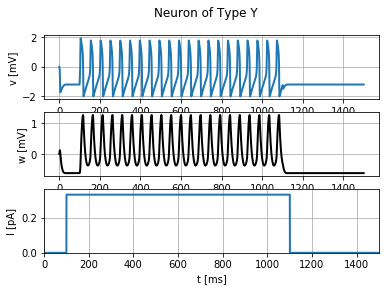

In [118]:
# create an input current
I_amp=0.33*b2.pA
input_current = input_factory.get_step_current(
    100, 1100, 1.*b2.ms, I_amp)
# get an instance of class NeuronY
a_neuron_of_type_Y = neurons.NeuronY()  # we do not know if it's type I or II
state_monitor = a_neuron_of_type_Y.run(
    input_current, 1500*b2.ms)
neurons.plot_data(state_monitor, title="Neuron of Type Y")

About $2mV$. There is a jump, type II.

## Exercise: f-I curves

### Get firing rates from simulations

In [33]:
spike_tools.get_spike_time?

In [67]:
I_amp=0.38*b2.pA
input_current = input_factory.get_step_current(
    100, 1100, 1.*b2.ms, I_amp)
a_neuron_of_type_X = neurons.NeuronX()
state_monitor = a_neuron_of_type_X.run(
    input_current, 1500*b2.ms)

def get_firing_rate(neuron,input_current,spike_threshold):
    state_monitor = neuron.run(input_current, 1500*b2.ms)
    spike_times = spike_tools.get_spike_time(state_monitor, spike_threshold=spike_threshold)
    return 1/b2.mean(b2.diff(spike_times))

In [69]:
get_firing_rate(a_neuron_of_type_X,input_current,25*b2.mV)

4.17594655 * hertz

In [68]:
spike_tools.pretty_print_spike_train_stats(
    state_monitor,25*b2.mV)

nr of spikes: 4
mean ISI: 0.23946666666666672
ISI variance: 2.222222222221733e-09
spike freq: 4.175946547884187
spike times: [0.3146 0.5541 0.7936 1.033 ] s
ISI: [239.5 239.5 239.4] ms


(array([0.3146, 0.5541, 0.7936, 1.033 ]) * second,
 array([239.5, 239.5, 239.4]) * msecond,
 239.46666667 * msecond,
 4.17594655 * hertz,
 2222.22222222 * usecond2)

### Plot the f-I curve

In [97]:
import matplotlib.pyplot as plt
import numpy as np

def plot_fI_curve(NeuronClass):
    plt.figure()  # new figure
    neuron = NeuronClass  # instantiate the neuron class
    I = np.arange(0.34,0.50,0.01)  # a range of current inputs
    f = []
    # loop over current values
    for I_amp in I:
        input_current=input_factory.get_step_current(
            100, 1100, 1.*b2.ms, I_amp*b2.pA)
        firing_rate =get_firing_rate(
            neuron,
            input_current=input_current,
            spike_threshold=25*b2.mV
        ) # insert here a call to your function get_firing_rate( ... )
        f.append(firing_rate)
    plt.plot(I, f)
    plt.xlabel('Amplitude of Injecting step current (pA)')
    plt.ylabel('Firing rate (Hz)')
    plt.grid()
    plt.show()

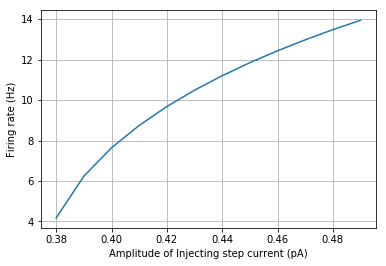

In [98]:
a_neuron_of_type_X = neurons.NeuronX()
plot_fI_curve(a_neuron_of_type_X)

In [114]:
import matplotlib.pyplot as plt
import numpy as np

def plot_fI_curve(NeuronClass):
    plt.figure()  # new figure
    neuron = NeuronClass  # instantiate the neuron class
    I = np.arange(0.30,0.60,0.01)  # a range of current inputs
    f = []
    # loop over current values
    for I_amp in I:
        input_current=input_factory.get_step_current(
            100, 1100, 1.*b2.ms, I_amp*b2.pA)
        firing_rate =get_firing_rate(
            neuron,
            input_current=input_current,
            spike_threshold=1.8*b2.mV
        ) # insert here a call to your function get_firing_rate( ... )
        f.append(firing_rate)
    plt.plot(I, f)
    plt.xlabel('Amplitude of Injecting step current (pA)')
    plt.ylabel('Firing rate (Hz)')
    plt.grid()
    plt.show()

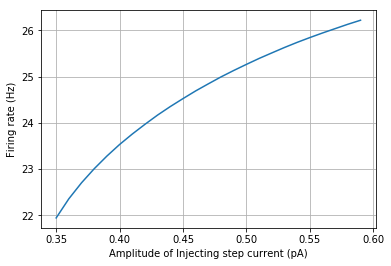

In [115]:
a_neuron_of_type_Y = neurons.NeuronY()
plot_fI_curve(a_neuron_of_type_Y)

In [117]:
print("a_neuron_of_type_X is : {}".format(a_neuron_of_type_X.get_neuron_type()))
print("a_neuron_of_type_Y is : {}".format(a_neuron_of_type_Y.get_neuron_type()))

a_neuron_of_type_X is : Type I
a_neuron_of_type_Y is : Type II
